##  Objective:-The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

## Importing Training Dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,accuracy_score
from joblib import dump,load

In [2]:
dataset=pd.read_csv("Datasets//Train.csv")

In [3]:
dataset.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
dataset.shape

(8523, 12)

## Analyzing Training dataset

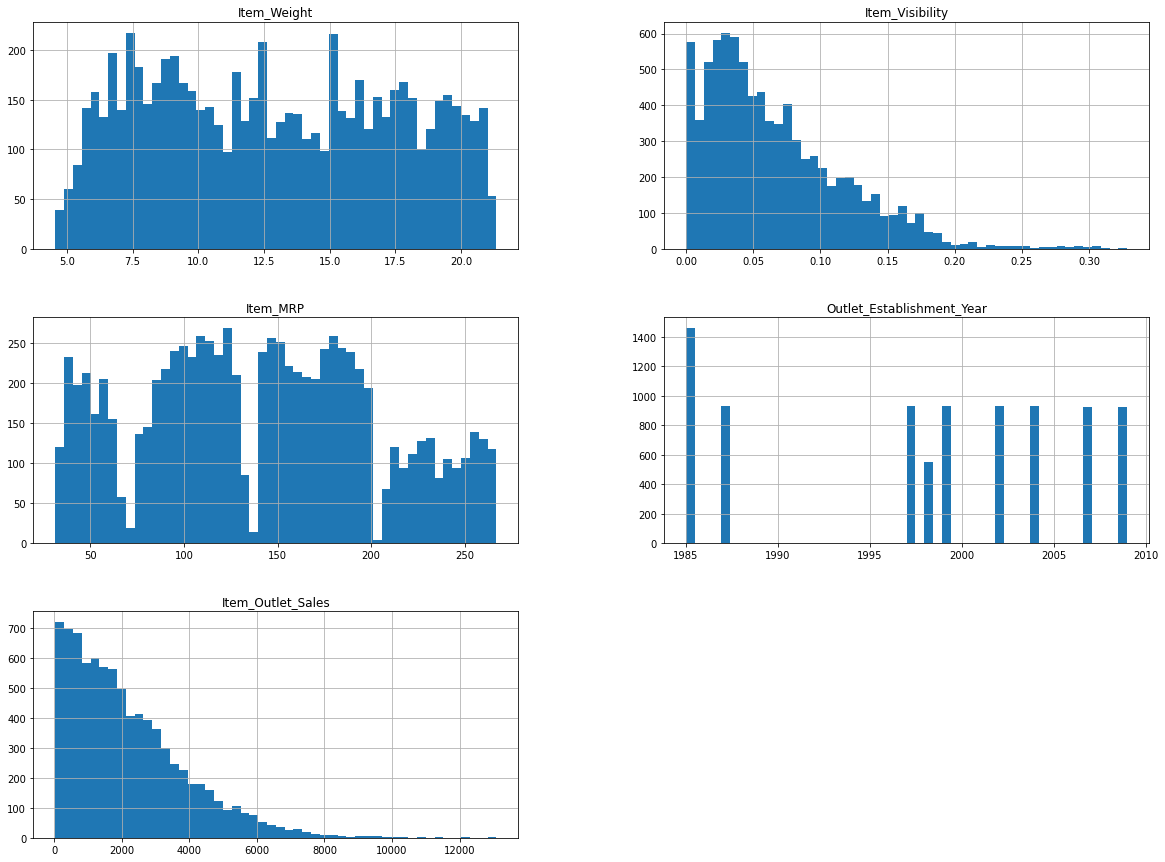

In [7]:
# we will analyze only the training set
dataset.hist(bins=50,figsize=(20,15))
plt.show()

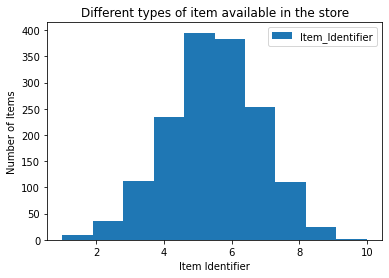

In [8]:
# we will analyze only the training set

dataset['Item_Identifier'].value_counts(normalize = True)
dataset['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

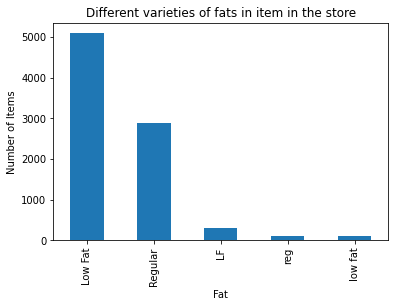

In [9]:
# checking different varieties of item fat content

dataset['Item_Fat_Content'].value_counts(normalize = True)
dataset['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

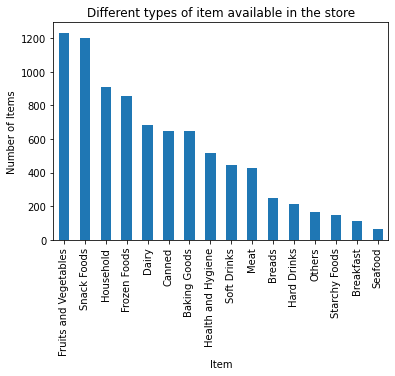

In [10]:
# we will analyze only the training set

dataset['Item_Type'].value_counts(normalize = True)
dataset['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

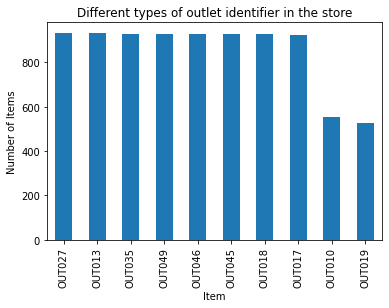

In [11]:
# we will analyze only the training set

dataset['Outlet_Identifier'].value_counts(normalize = True)
dataset['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

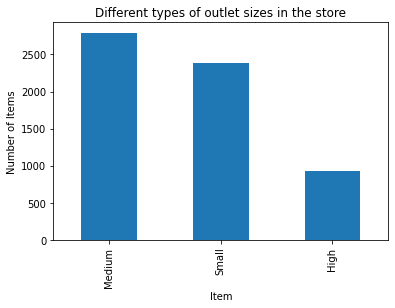

In [12]:
# we will analyze only the training set

dataset['Outlet_Size'].value_counts(normalize = True)
dataset['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

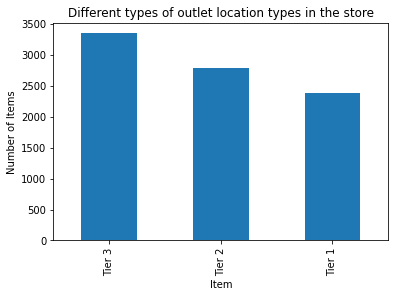

In [13]:
# we will analyze only the training set

dataset['Outlet_Location_Type'].value_counts(normalize = True)
dataset['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


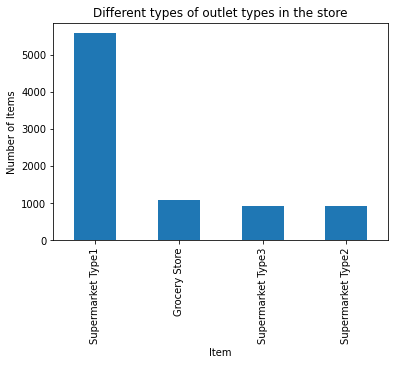

In [14]:
# we will analyze only the training set

dataset['Outlet_Type'].value_counts(normalize = True)
dataset['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


## Tring out Attribute combinations

<b> 1.Getting the first two characters of ID to separate them into different Categories

In [15]:
dataset['New_Item_Type'] = dataset['Item_Identifier'].apply(lambda x: x[:2])
dataset['New_Item_Type']
dataset['New_Item_Type'] = dataset['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
dataset['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64



<b> 2.Combing reg,Regular and Low Fat,low fat and LF and add Non-Consumable/Non-Edible item 

In [16]:
dataset.loc[dataset['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
dataset['Item_Fat_Content'].value_counts()
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
dataset['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

<b> 3.Determining the operation period of a time

In [17]:
dataset['Outlet_Establishment_Year'] = 2013 - dataset['Outlet_Establishment_Year']
dataset['Outlet_Establishment_Year'].value_counts()

28    1463
26     932
16     930
9      930
14     930
11     929
4      928
6      926
15     555
Name: Outlet_Establishment_Year, dtype: int64

<b> 4.Removing unnecassary columns from the dataset

In [18]:
dataset.drop("Item_Identifier",axis=1,inplace=True)

In [19]:
dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,15,NaN,Tier 3,Grocery Store,732.3800,Food
4,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


# checking correlation matrix

In [20]:

corr_matrix=dataset.corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,-0.005020,0.567574
Outlet_Establishment_Year,0.011588,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,0.049135,1.000000


## Data cleaning

In [21]:
#checking all columns of dataset 
dataset.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'New_Item_Type'],
      dtype='object')

<b> Hot Encoding

In [22]:
dataset = pd.get_dummies(dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])

<b> Label Encoding

In [23]:

encode = LabelEncoder()
cat_col = ['Outlet_Identifier', 'Item_Type']
for col in cat_col:
     dataset[col] = encode.fit_transform(dataset[col])

In [24]:
dataset.head(20)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,9,14,3735.1380,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,3,4,443.4228,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,9,14,2097.2700,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.000000,6,182.0950,0,15,732.3800,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.000000,9,53.8614,1,26,994.7052,0,1,0,...,0,0,1,0,1,0,0,0,0,1
5,10.395,0.000000,0,51.4008,3,4,556.6088,0,0,1,...,0,0,1,0,0,1,0,0,1,0
6,13.650,0.012741,13,57.6588,1,26,343.5528,0,0,1,...,0,0,1,0,1,0,0,0,1,0
7,NaN,0.127470,13,107.7622,5,28,4022.7636,1,0,0,...,0,0,1,0,0,0,1,0,1,0
8,16.200,0.016687,5,96.9726,7,11,1076.5986,0,0,1,...,0,1,0,0,1,0,0,0,1,0
9,19.200,0.094450,5,187.8214,2,6,4710.5350,0,0,1,...,0,1,0,0,1,0,0,0,1,0


<b> Checking Missing Value

In [25]:
dataset.isnull().sum()

Item_Weight                      1463
Item_Visibility                     0
Item_Type                           0
Item_MRP                            0
Outlet_Identifier                   0
Outlet_Establishment_Year           0
Item_Outlet_Sales                   0
Item_Fat_Content_Low Fat            0
Item_Fat_Content_Non-Edible         0
Item_Fat_Content_Regular            0
Outlet_Size_High                    0
Outlet_Size_Medium                  0
Outlet_Size_Small                   0
Outlet_Location_Type_Tier 1         0
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
New_Item_Type_Drinks                0
New_Item_Type_Food                  0
New_Item_Type_Non-Consumable        0
dtype: int64

<b> Adding Missing Values

In [26]:
imputer=SimpleImputer(strategy="median")
imputer.fit(dataset)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([1.2600000e+01, 5.3930934e-02, 6.0000000e+00, 1.4301280e+02,
       5.0000000e+00, 1.4000000e+01, 1.7943310e+03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00])

In [28]:
Imputer=imputer.transform(dataset)

In [29]:
dataset=pd.DataFrame(Imputer,columns=dataset.columns)


In [30]:
dataset.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Non-Edible      0
Item_Fat_Content_Regular         0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
New_Item_Type_Drinks             0
New_Item_Type_Food               0
New_Item_Type_Non-Consumable     0
dtype: int64

In [31]:
dataset.shape

(8523, 23)

In [32]:
dataset.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.30,0.016047,4.0,249.8092,9.0,14.0,3735.1380,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.92,0.019278,14.0,48.2692,3.0,4.0,443.4228,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,17.50,0.016760,10.0,141.6180,9.0,14.0,2097.2700,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,19.20,0.000000,6.0,182.0950,0.0,15.0,732.3800,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8.93,0.000000,9.0,53.8614,1.0,26.0,994.7052,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Building

<b> Splitting The Data Into Features and Lebels

In [33]:
x=dataset.drop("Item_Outlet_Sales",axis=1)
y=dataset["Item_Outlet_Sales"]

<b> Features Scaling

In [34]:
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [35]:
scaling=scaler.transform(x)

In [36]:
x=pd.DataFrame(scaling,columns=x.columns)

<b> Splitting the Data Into Train and Test,and Making x_train,y_train,x_test,y_test

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=20,shuffle=True)

<b>Selecting the Model -Choose RandomForestRegressor because its gives better accuracy than LinearRegression

In [38]:
model=RandomForestRegressor(n_estimators=100,max_depth=6,min_samples_leaf=50,n_jobs=4)
#model=LinearRegression()
#model=DecisionTreeRegressor()

In [39]:
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

<b>Predicting the model

In [40]:
pred=model.predict(x_test)


<b>Finding the Mean Squared Error and Root Mean Squared Error


In [41]:
prediction=model.predict(x_train)
mse=mean_squared_error(y_train,prediction)
rmse=np.sqrt(mse)

In [42]:
rmse

1062.821521478979

# Cross validation

In [43]:
scores= cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-scores)
rmse_scores

array([1054.68361635, 1111.02134749, 1095.65779726, 1066.47609618,
       1095.54267989])

In [44]:
def print_scores(scores):
    print("Validation scores of the model",scores)
    print("mean value: ",scores.mean())
    print("Standard Deviation",scores.std())
print_scores(rmse_scores)

Validation scores of the model [1054.68361635 1111.02134749 1095.65779726 1066.47609618 1095.54267989]
mean value:  1084.6763074351447
Standard Deviation 20.801641822366093


<b>Checking Accuracy Score

In [45]:
accuracy=r2_score(y_test,model.predict(x_test))
print("Average accuracy of the model",accuracy*100)

Average accuracy of the model 59.785641023617764


# Plotting True Value and Predicted

Text(0, 0.5, 'Predicted')

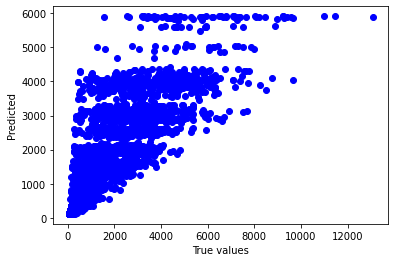

In [46]:
plt.scatter(y_test,pred,c='blue',marker='o',label="Test data")
plt.xlabel("True values")
plt.ylabel("Predicted")

## Saving Model

In [47]:
dump(model,'project.joblib')

['project.joblib']